# Assessment Problems

## Problem 1: Extending the Lady Tasting Tea

### Description of the problem

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In the notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Libraries

In [136]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

### Description of the original experiment. 

In the original experiment the lady claims she can know by tasting the tea cups if the milk or the tea was poured first. The experiment is based with 8 cups: 4 tea-first, 4 milk-first). 

Needs to be finished the description of the original experiment from the Lecture notes. 

### Extending the experiment. 

In the extended version of the Lady Tasting Tea experiment, 12 cups are prepared: 8 with tea poured first and 4 with milk poured first. The participant asserts that they can correctly identify which cups were prepared by pouring tea first versus milk first

In [137]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4


#### Looking at different ways to choose the cup of tea    

##### Using the math.comb(n, k) 

In this experiment the use of math.comb method returns the number of combinations of k unordered outcomes from n possibilities, without repetition. 

Checked https://www.w3schools.com/python/ref_math_comb.asp for clarification of how this method is applied.

The `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

n = 12 (Number of cups of tea in total)

k = 4 (Number of cups of tea with milk first)

In [138]:
# Number of ways of selecting four cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

Here we can see there are 495 possible unique guesses (randomly) to choose the cups that have milk first. But this ones have not order.

So the next step is adding a label to the cups of tea like: `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11`, and `12`.

Then we can select four cups to have milk in first.

For example, I might select `1`, `3`, `7`, and `9`.

How many ways are there to select four cups from eight?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

In [139]:
# Total number of ways of selecting four cups from 12, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [140]:
# Number of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [141]:
# Number of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

So, right now we can see that there are 11,880 different ordered selections the lady could make when choosing 4 cups out of 12. These are permutations, where the order of selection matters:

Ordered selections (permutations):

$P(12, 4) = 12 \times 11 \times 10 \times 9 = 11,880$


However, in the context of the Lady Tasting Tea experiment, we are only interested in which 4 cups the lady selects as being poured with milk first, regardless of the order in which she picks them. So we divide by the number of ways to arrange 4 items.

Unordered selections (combinations):
$$
C(12, 4) = \frac{11,880}{4!} = \frac{11,880}{24} = 495
$$

This final number, 495, represents the number of unique combinations (unordered selections) of 4 cups out of 12. It is this number we use when analyzing the statistical significance of her performance, since the order doesn't matter, only the subset she chooses.

(Used ChatGPT to create the formula-equation in the markdown)

##### Using numpy in the experiment.


In [142]:
# Looking at all the combinations for the 12 cups of tea using numpy.

cups = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
combinations = list(itertools.combinations(cups, no_cups_milk_first))
combinations_array = np.array(combinations)
combinations_array

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       ...,
       [ 7,  8, 10, 11],
       [ 7,  9, 10, 11],
       [ 8,  9, 10, 11]])

In [143]:
# Looking at the number of combinations.
number_of_combinations = combinations_array.shape[0]
number_of_combinations

495

In [144]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample and following the notebook from the lecture
# The cup labels.
labels = list(range(no_cups))

# Show.
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 4, 9, 10]

In [145]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{2, 4, 9, 10}

In [146]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combinations_array:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

# Show the overlaps.
print(no_overlaps)

[0 1 2 3] 1 {2}
[0 1 2 4] 2 {2, 4}
[0 1 2 5] 1 {2}
[0 1 2 6] 1 {2}
[0 1 2 7] 1 {2}
[0 1 2 8] 1 {2}
[0 1 2 9] 2 {9, 2}
[ 0  1  2 10] 2 {2, 10}
[ 0  1  2 11] 1 {2}
[0 1 3 4] 1 {4}
[0 1 3 5] 0 set()
[0 1 3 6] 0 set()
[0 1 3 7] 0 set()
[0 1 3 8] 0 set()
[0 1 3 9] 1 {9}
[ 0  1  3 10] 1 {10}
[ 0  1  3 11] 0 set()
[0 1 4 5] 1 {4}
[0 1 4 6] 1 {4}
[0 1 4 7] 1 {4}
[0 1 4 8] 1 {4}
[0 1 4 9] 2 {9, 4}
[ 0  1  4 10] 2 {10, 4}
[ 0  1  4 11] 1 {4}
[0 1 5 6] 0 set()
[0 1 5 7] 0 set()
[0 1 5 8] 0 set()
[0 1 5 9] 1 {9}
[ 0  1  5 10] 1 {10}
[ 0  1  5 11] 0 set()
[0 1 6 7] 0 set()
[0 1 6 8] 0 set()
[0 1 6 9] 1 {9}
[ 0  1  6 10] 1 {10}
[ 0  1  6 11] 0 set()
[0 1 7 8] 0 set()
[0 1 7 9] 1 {9}
[ 0  1  7 10] 1 {10}
[ 0  1  7 11] 0 set()
[0 1 8 9] 1 {9}
[ 0  1  8 10] 1 {10}
[ 0  1  8 11] 0 set()
[ 0  1  9 10] 2 {9, 10}
[ 0  1  9 11] 1 {9}
[ 0  1 10 11] 1 {10}
[0 2 3 4] 2 {2, 4}
[0 2 3 5] 1 {2}
[0 2 3 6] 1 {2}
[0 2 3 7] 1 {2}
[0 2 3 8] 1 {2}
[0 2 3 9] 2 {9, 2}
[ 0  2  3 10] 2 {2, 10}
[ 0  2  3 11] 1 {2}
[0 2 4 5]

In [147]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

In [148]:
sum_counts = np.sum(counts[1])
sum_counts

495

<BarContainer object of 5 artists>

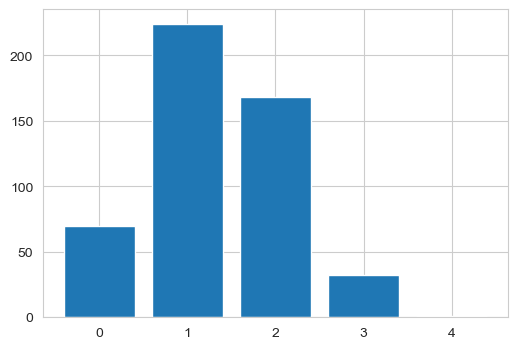

In [149]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1])

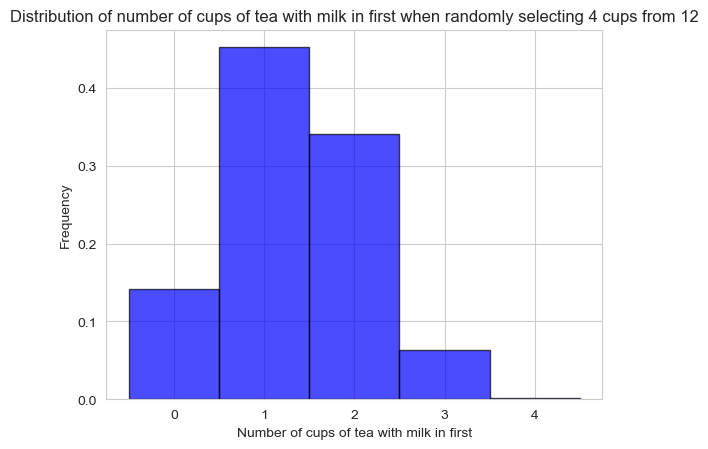

In [150]:
# In a histogram, show the distribution of number of cups of tea with milk in first
# when randomly selecting 4 cups from 12. 
milk_first_counts = []
n_trials = 100000
for _ in range(n_trials):
    selected_cups = random.sample(range(no_cups), no_cups_milk_first)
    milk_first_count = sum(1 for cup in selected_cups if cup < no_cups_milk_first)
    milk_first_counts.append(milk_first_count)
plt.hist(milk_first_counts, bins=np.arange(-0.5, no_cups_milk_first + 1.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(no_cups_milk_first + 1))
plt.xlabel('Number of cups of tea with milk in first')
plt.ylabel('Frequency')
plt.title('Distribution of number of cups of tea with milk in first when randomly selecting 4 cups from 12')
plt.show()

#### The Null Hypothesis
The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

The lady is selecting the four cups from the twelve cups at random.

#### Alternative Hypothesis

The lady can tell the difference.

#### Evidence
Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in four hundred ninety five. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea.

In [151]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [152]:
# The probability that she (randomly) selects at least three correct cups.
(32 + 1) / 495

0.06666666666666667

In [153]:
# Looking at the estimated probability of success of choosing 4 cups of tea with milk in first out of 12 randomly.
# Number of cups
no_cups = 12
no_cups_milk_first = 4
trials = 10000

# Label cups: 0–3 = milk-first, 4–11 = tea-first
cups = np.arange(no_cups)

# Counter for successes
successes = 0

for _ in range(trials):
    selection = np.random.choice(cups, size=no_cups_milk_first, replace=False)
    if np.all(np.isin([0, 1, 2, 3], selection)):
        successes += 1

# Estimated probability
probability = successes / trials
print("Estimated probability of success:", probability)

Estimated probability of success: 0.0021


A "success" will happen if the lady selection includes all four milk-first cups (M1–M4). The probability of this happening is a 0.2% chance of randomly selecting exactly the four milk-first cups out of twelve. 

I added a Monte Carlo simulation with 10,000 trials to estimate the probability of selecting all four milk-first cups out of twelve. The repeated random sampling produced an approximate probability of 0.002 (0.2%), closely matching the analytical result. 

I've been looking at [geeksforgeeks](https://www.geeksforgeeks.org/python/monte-carlo-integration-in-python/) and [KDnuggets](https://www.kdnuggets.com/numpy-simulating-random-processes-monte-carlo-methods) for the Monte Carlo information and how to applied with NumPy.

0.0021


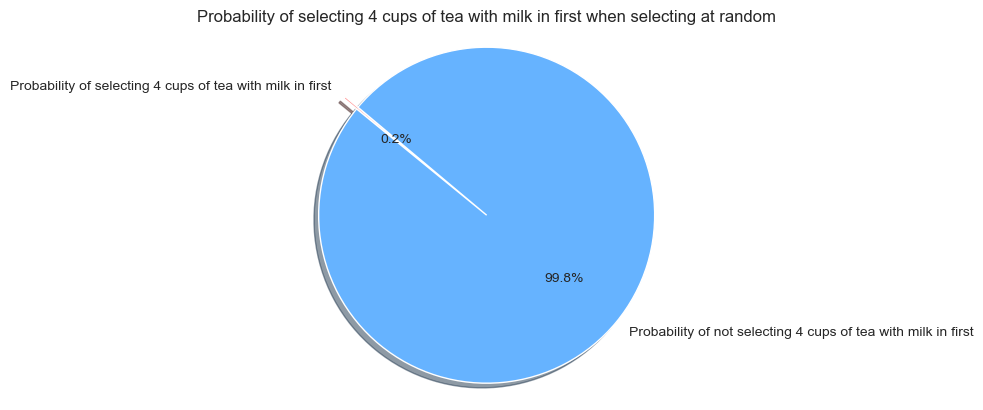

495
11880


In [154]:
# looking in pie chart for the percent chances of selecting 4 cups of tea with milk in first when selecting at random
# chances of selecting 4 cups of tea with milk in first when selecting at random
probability = successes / trials
print(probability)
probability_percentage = probability * 100
probability_percentage
labels = ['Probability of selecting 4 cups of tea with milk in first', 'Probability of not selecting 4 cups of tea with milk in first']
sizes = [probability_percentage, 100 - probability_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Probability of selecting 4 cups of tea with milk in first when selecting at random')
plt.show()

print(no_combs)
print(ways_ordered)

### Type I Errors, Type II Errors, and Power

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Libraries

In [155]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm


### Generate 100,000 samples of size 10

First I'll generate 100,000 samples of size 10 from the standard normal distribution. 

In [156]:
def generate_samples(n_samples, sample_size):
    # generate samples from the standard normal distribution
    return np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

n_samples = 100000
sample_size = 10
samples = generate_samples(n_samples, sample_size)

print(samples)

[[-0.08394088 -0.61018044 -1.15786677 ...  0.08199954 -1.10980221
   1.08189133]
 [ 0.62202183  0.5546375   1.10221551 ... -1.2437366   0.58848844
  -0.13890181]
 [ 0.52327579  0.24256154  0.39514817 ... -1.59494406  0.70527091
   0.84899176]
 ...
 [-1.62052044 -0.74471462  0.44455562 ... -0.99542148 -0.26648612
  -0.62086678]
 [ 0.20233238 -0.00299155  0.52106506 ... -0.66577194 -0.48436757
  -1.84916828]
 [-0.95260135  0.18412696  0.17307538 ...  0.26354087 -0.24906719
   0.43514563]]


### Compute standard deviations

The second step will be compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD).

In [157]:
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)
print(sample_std)
print(population_std)

[0.87235601 0.65309221 0.83901994 ... 0.88489087 0.80249908 0.73637209]
[0.82758958 0.61957767 0.7959642  ... 0.83948119 0.76131747 0.6985839 ]


### Plot histograms.

Plot histograms of both sets of values on the same axes with transparency.

Looking at [geeksforgeeks](https://www.geeksforgeeks.org/python/overlapping-histograms-with-matplotlib-in-python/) for information about the plots with transparency bars.

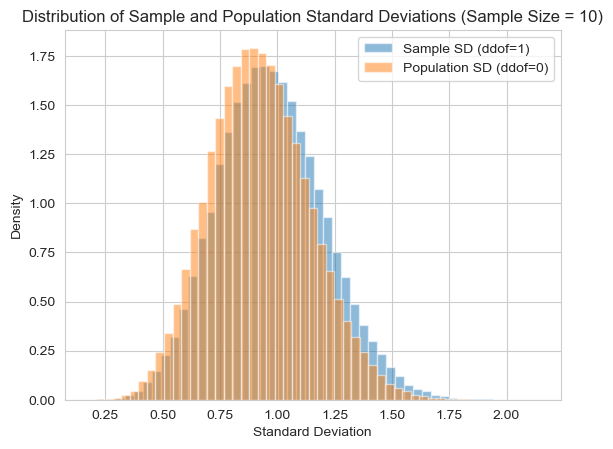

In [158]:
# Plot histograms of the two standard deviations 

fig, ax = plt.subplots()
ax.hist(sample_std, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations (Sample Size = 10)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

### Analysis of differences

After running the code and plotting the histograms, you can observe the following:

The histogram for the sample standard deviation (ddof=1) is shifted to the right compared to the population standard deviation (ddof=0). This shows that, on average, the sample standard deviation is a bit larger than the population standard deviation for the same data.

This happens because the sample standard deviation gives a more accurate estimate of the true population spread. In contrast, the population standard deviation, when calculated from a sample, tends to underestimate the real variation. Using n-1 (ddof=1) instead of n (ddof=0) fixes this issue by adjusting for the fact that a sample doesn’t capture all the variation in the population.

### Impact of Increased Sample Size

If you increase the `sample_size` from 10 to a larger number (e.g., 100 or 1000), you should expect to see the following changes:

1.  **Both histograms will become narrower** and more tightly centered around the true standard deviation of the standard normal distribution, which is 1.
2.  **The difference between the two histograms will decrease.** As the sample size `n` increases, the difference between dividing by `n` and `n-1` becomes less significant. As a result, the two estimators will converge, and their distributions will become nearly identical as we can see in the below plots. 

[0.96157912 0.99840024 0.94459805 ... 1.02801067 1.0301274  1.08166167]
[0.95675915 0.9933957  0.93986319 ... 1.0228577  1.02496382 1.07623978]


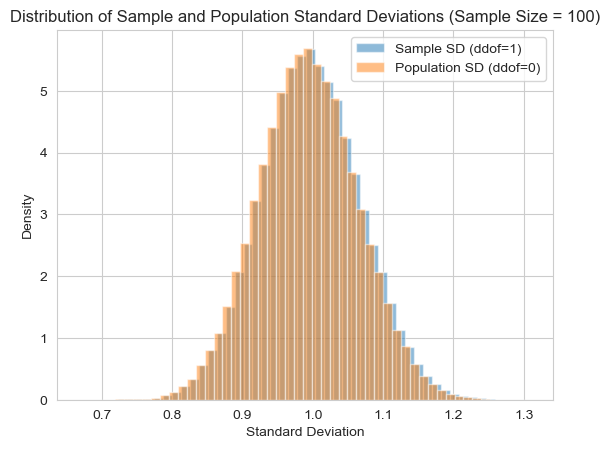

In [159]:
# plotting the impact of increasing sample size on the distributions of sample and population standard deviations by 100. 
n_samples = 100000
sample_size = 100
samples = generate_samples(n_samples, sample_size)
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)
print(sample_std)
print(population_std)

#plot histograms of the two standard deviations
fig, ax = plt.subplots()
ax.hist(sample_std, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations (Sample Size = 100)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

[0.96873426 1.00311094 1.01467141 ... 0.99068423 0.99392497 0.99427411]
[0.96824978 1.00260926 1.01416394 ... 0.99018876 0.99342788 0.99377685]


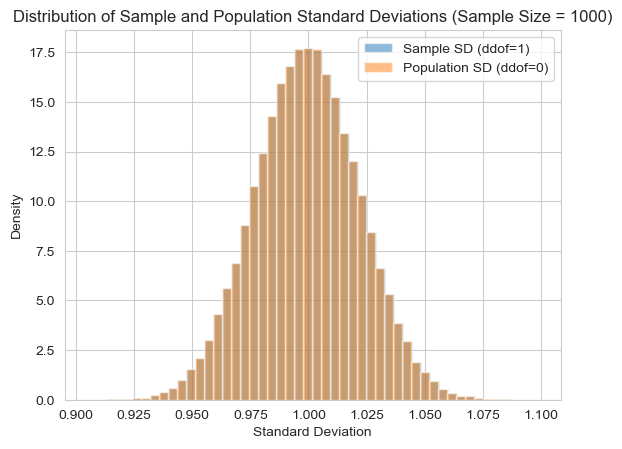

In [160]:
# plotting the impact of increasing sample size on the distributions of sample and population standard deviations by 100. 
n_samples = 100000
sample_size = 1000
samples = generate_samples(n_samples, sample_size)
# Compute sample SD (ddof=1) and population SD (ddof=0)
sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)
print(sample_std)
print(population_std)

#plot histograms of the two standard deviations
fig, ax = plt.subplots()
ax.hist(sample_std, bins=50, alpha=0.5, label='Sample SD (ddof=1)', density=True)
ax.hist(population_std, bins=50, alpha=0.5, label='Population SD (ddof=0)', density=True)
ax.set_title('Distribution of Sample and Population Standard Deviations (Sample Size = 1000)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

Here in the last plot we can see that the two distributions are nearly identical, indicating that as the sample size increases, the difference between using n and n-1 for standard deviation calculations becomes negligible.    

### Probability Density function

https://en.wikipedia.org/wiki/Normal_distribution

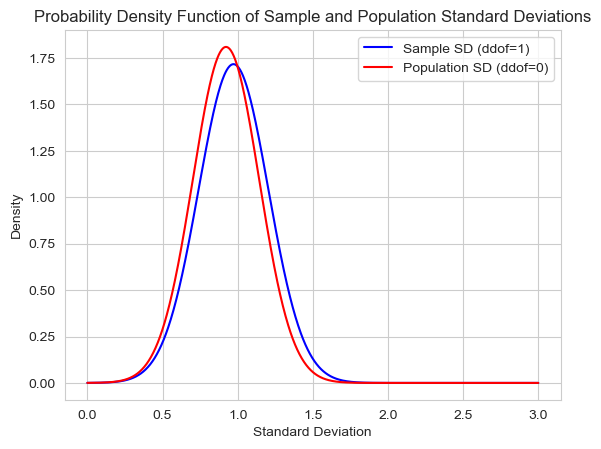

In [161]:
# looking at the probability density function of the standard normal distribution using the sample function and the population function
n_samples = 100000
sample_size = 10
samples = generate_samples(n_samples, sample_size)
# Compute sample SD (ddof=1) and population SD (ddof=0) 

sample_std = np.std(samples, axis=1, ddof=1)
population_std = np.std(samples, axis=1, ddof=0)

# Plotting the PDF using scipy.stats of the standard normal distribution using the sample function and the population function
x = np.linspace(0, 3, 1000)
pdf_sample = stats.norm.pdf(x, loc=np.mean(sample_std), scale=np.std(sample_std))
pdf_population = stats.norm.pdf(x, loc=np.mean(population_std), scale=np.std(population_std))
fig, ax = plt.subplots()
ax.plot(x, pdf_sample, label='Sample SD (ddof=1)', color='blue')
ax.plot(x, pdf_population, label='Population SD (ddof=0)', color='red')
ax.set_title('Probability Density Function of Sample and Population Standard Deviations')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()


## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d =0, 0.1, 0.2,…, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean 
d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

#### Explanation of the experiment 
In this section we are going to simulate the **Type II error** in a t-test for two independent samples. 
The objective is to observe how the probability of not detecting a real difference between means changes when the true difference (d) increases. Two normal samples will be generated, the t-test will be applied and it will be calculated how many times the null hypothesis is not rejected.

### Libraries

In [162]:
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

In [163]:
# First we need to set the parameters for the simulation.
sample_size = 100
num_simulations = 1000
alpha = 0.05
mean_differences = np.arange(0, 1.1, 0.1)

In [164]:
# Now we'll look at the mean differences
print(mean_differences)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [165]:
# Store the proportion of times the null hypothesis is rejected for each mean difference.
type2_errors_rates = []

In [166]:
# Run the simulations for each mean difference.
# Loop through each mean difference.
for d in mean_differences:
    # Start counter for non-rejections.
    num_not_rejected = 0
    # Run simulations several times.
    for _ in range(num_simulations):
        # Generate two groups of samples.
        group1 = np.random.normal(loc=0, scale=1, size=sample_size)
        group2 = np.random.normal(loc=d, scale=1, size=sample_size)
        
        # Perform the t-test.
        # Calculate the t-statistic and p-value.
        t_stat, p_value = stats.ttest_ind(group1, group2)
        # Checking if the null hypothesis is not rejected.
        # If p >= alpha, doesn't reject H0 (possible Type II error)
        # This means we failed to detect a difference when there actually is one.
        # If p equals or greater than alpha, we do not reject the null hypothesis.
        if p_value >= alpha:
            num_not_rejected += 1

    # Calculate the proportion of times the null hypothesis is not rejected.
    non_rejection_proportion = num_not_rejected / num_simulations
    type2_errors_rates.append(non_rejection_proportion)

#### Interpretation of numerical results 
The proportion obtained represents the **Type II error**: the probability that the test does not detect a real difference. By increasing the difference d, the distributions separate and the test gains power, so the Type II error decreases.

In [167]:
type2_errors_rates

[0.952, 0.904, 0.704, 0.45, 0.214, 0.053, 0.007, 0.002, 0.0, 0.0, 0.0]

In [168]:
# Looking at the samples generated in the 100 simulations.

group1, group2

(array([ 2.26537591e-02, -1.30785718e-01, -1.78080117e-01,  5.06319302e-01,
        -1.24838650e+00, -3.82650520e-01, -5.72302840e-01, -6.77614439e-01,
        -1.48150307e+00, -1.14493699e+00, -4.71601647e-01, -4.41721950e-01,
        -1.08766226e+00, -1.99459710e+00,  4.01408945e-01, -6.50369657e-01,
         6.60552073e-01,  7.74864960e-01,  1.01700823e-01, -8.18062612e-02,
        -6.65904581e-01,  1.87894777e+00,  9.57584535e-01, -1.34593005e+00,
         1.58743676e-01,  1.59019836e+00,  3.00336720e-01,  1.04461025e-01,
         1.36339139e-01,  1.51932126e-02, -1.44411714e-01,  6.60320814e-01,
        -8.59628719e-01,  1.12218138e+00, -2.77627074e+00, -4.87184486e-01,
        -2.58649571e-01,  7.85354550e-01, -4.30485847e-03, -1.00255331e+00,
         5.18576570e-01, -1.39971055e+00,  1.52406886e+00,  1.10322410e-01,
         7.10197779e-03, -1.70054207e-01,  1.37275712e-01,  3.19621532e-01,
        -2.38532416e-01, -1.17464098e+00, -5.97452058e-01,  2.67526051e-01,
         1.0

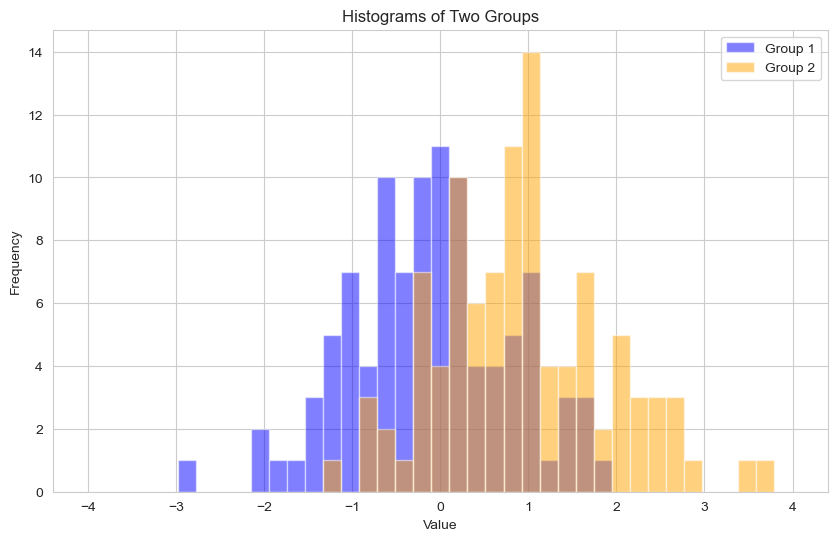

In [ ]:
# Plotting the histograms of the two groups generated in the simulations
# Create the figure and axis for the histogram
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.linspace(-4, 4, 40)  # common bins for both groups

# Plotting histogram for Group 1.
# alpha=0.5 makes the bars semi-transparent so the overlap between groups is visible.
ax.hist(group1, bins=bins, color='blue', alpha=0.5, label='Group 1')

# Plotting histogram for Group 2.
# Following the same approach for Group 1.
ax.hist(group2, bins=bins, color='orange', alpha=0.5, label='Group 2')

# Add title, axis labels, and legend.
ax.set_title('Histograms of Two Groups')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

This histogram compares the distributions of Group 1 and Group 2, which were generated from:
- **Group 1:** \( N(0, 1) \)  
- **Group 2:** \( N(d, 1) \), where \( d \) is the mean difference used in the simulation.

The bins were created using `np.linspace(-4, 4, 40)`, which generates many small, evenly spaced intervals suitable for continuous normal data. This allows the histogram to represent the true shape of both distributions without distortion.

Both groups follow a bell-shaped pattern, as expected from normal distributions. Group 1 (blue) is centered around 0, while Group 2 (orange) is slightly shifted to the right, reflecting the value of the mean difference 
d
d. The two histograms overlap considerably, especially in the region between 0 and 1.

The amount of overlap between the distributions illustrates why Type II error occurs. When the distributions look very similar (large overlap), the t-test has difficulty detecting the difference between them, resulting in a higher Type II error rate. When the distributions are further apart (less overlap), the t-test is more likely to detect the true difference, leading to a lower Type II error rate.

Overall, the histogram visually demonstrates the core idea of the simulation: how the difference in means 
d
d affects the overlap between the groups and, in turn, influences the Type II error rate.

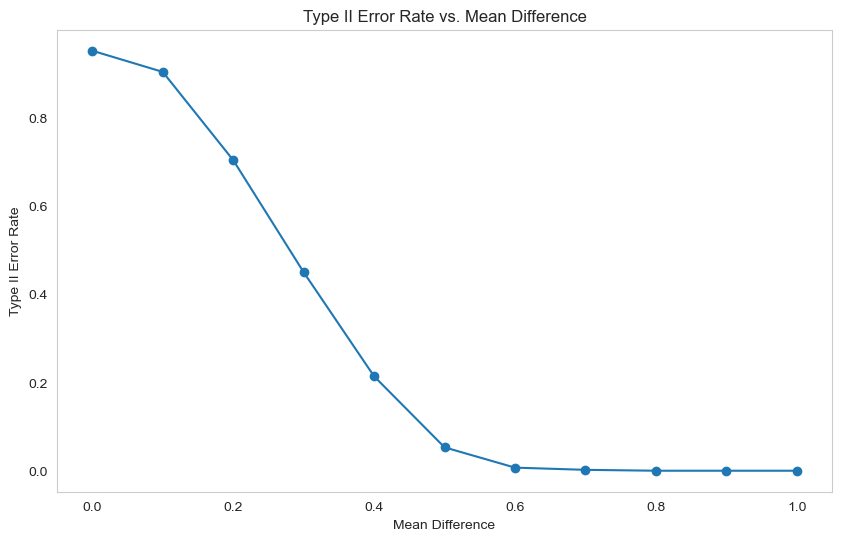

In [178]:
# Plotting the Type II error rate for each mean difference
plt.figure(figsize=(10, 6))

# Line plot with markers showing how Type II error changes as d increases
plt.plot(mean_differences, type2_errors_rates, marker='o')

# Add title, axis labels, and legend.
plt.title('Type II Error Rate vs. Mean Difference')
plt.xlabel('Mean Difference')
plt.ylabel('Type II Error Rate')
plt.grid()

plt.show()


This plot shows how the **Type II error rate** changes as the mean difference \( d \) between the two groups increases.

- When \( d \) is small, the distributions overlap heavily and the t-test often fails to detect the difference → **high Type II error**.
- As \( d \) increases, the groups become more distinguishable → **Type II error decreases quickly**.
- For \( d \geq 0.6 \), the error rate is close to zero because the test reliably detects the difference.

Overall, the plot shows that **larger effect sizes lead to higher statistical power** and fewer Type II errors.

### Independent Samples t-test

Looking at the Null hypothesis

In [171]:
# Perform a t-test.
stats.ttest_ind(group1, group2)

TtestResult(statistic=-7.980663757680097, pvalue=1.1539060323619992e-13, df=198.0)

### Plotting the Results

Create a plot to check the proportion against d, and explain how the type II error rate changes as the difference in means increases.

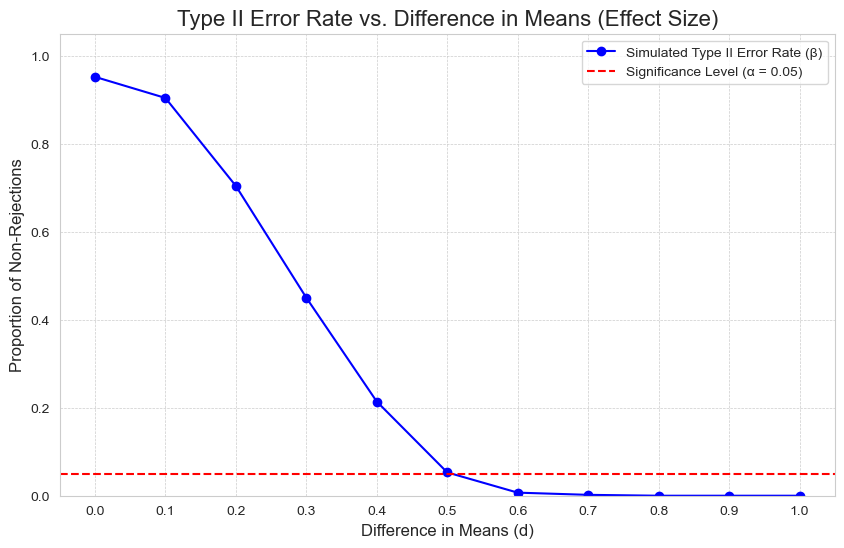

In [172]:
# Plotting the Results

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot the proportion of non-rejections (Type II error rate) against d.
plt.plot(mean_differences, type2_errors_rates, marker='o', linestyle='-', color='b', label='Simulated Type II Error Rate (β)')

# Add a horizontal line for the significance level for context.
# Use the existing variable 'alpha' (defined in cell 55) instead of undefined 'ALPHA'.
plt.axhline(y=alpha, color='r', linestyle='--', label=f'Significance Level (α = {alpha})')

# Adding the information related to labels and title.
plt.title('Type II Error Rate vs. Difference in Means (Effect Size)', fontsize=16)
plt.xlabel('Difference in Means (d)', fontsize=12)
plt.ylabel('Proportion of Non-Rejections', fontsize=12)
plt.xticks(mean_differences)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot.
plt.show()

In [173]:
# --- 4. Print the results for clarity ---
print("\n--- Simulation Results ---")
print("d\t| Prop. Non-Rejection (β)")
print("--------------------------------")
for d, rate in zip(mean_differences, type2_errors_rates):
    print(f"{d:.1f}\t| {rate:.3f}")


--- Simulation Results ---
d	| Prop. Non-Rejection (β)
--------------------------------
0.0	| 0.952
0.1	| 0.904
0.2	| 0.704
0.3	| 0.450
0.4	| 0.214
0.5	| 0.053
0.6	| 0.007
0.7	| 0.002
0.8	| 0.000
0.9	| 0.000
1.0	| 0.000


### Explanation of the Results

After running the code we can see the results in the plot and in a table. 

the plot shows and why the Type II error rate changes as it does:

The Overall Trend: The plot clearly demonstrates a strong inverse relationship between the difference in means (d) and the Type II error rate (β). As d increases, the proportion of times we fail to reject the null hypothesis decreases, approaching zero.

When d = 0 (The Null Hypothesis is True):

At d = 0, the two samples are drawn from the exact same distribution (N(0, 1)). In this specific case, the null hypothesis is true.
Failing to reject a true null hypothesis is a correct decision, not a Type II error.
The proportion of non-rejections you see at d=0 should be approximately 0.95. This is 1 - α, or 1 - 0.05. It means that 95% of the time, our test correctly concluded there was no significant difference when, in fact, there was none. The other 5% of the time, we committed a Type I error (incorrectly rejecting H₀), which is exactly what our significance level α dictates. This serves as a great sanity check for our simulation.

When d is Small (e.g., 0.1, 0.2):

When the true difference in means is small, the two population distributions are very close and have significant overlap.
When we draw samples, the random variation within each sample can easily obscure this small, true difference. The t-test has a hard time distinguishing the small effect from random noise.
Consequently, the p-value is often large (≥ 0.05), causing us to (incorrectly) fail to reject the null hypothesis. This results in a high Type II error rate. The test lacks the power to detect such a small effect.

As d Increases (e.g., 0.5, 0.6, ...):

As the difference in means grows, the two lines of distributions move further apart. The overlap between them shrinks dramatically.
It becomes more likely that the samples we draw will reflect this underlying separation. The difference between the sample means will be larger and more consistent.
The t-test can now easily detect this large, clear signal. The calculated t-statistic will be larger, leading to a very small p-value (< 0.05).
Therefore, we will correctly reject the null hypothesis most of the time. The probability of failing to do so (the Type II error rate) drops sharply and approaches zero. The power of the test (1 - β) increases significantly.

### Looking at the Paired Samples t_test

scipy.stats.ttest_rel

In [174]:
# A group of normally distributed samples.
group1 = np.random.normal(loc=0, scale=1, size=30)
group2 = np.random.normal(loc=0.5, scale=1, size=30)

<Axes: >

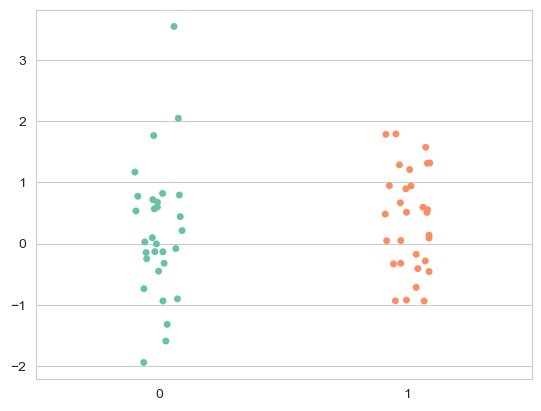

In [175]:
# Strip plot to visualize the paired samples.
sns.stripplot(data=[group1, group2], palette="Set2")

In [176]:
#Paired t-test simulation to estimate Type II error rates.

stats.ttest_rel(group1, group2)

TtestResult(statistic=-0.6667942412835135, pvalue=0.5101743840354858, df=29)

In [177]:
# One sample test - same values.




## Problem 4: ANOVA

### Libraries

## End

*************